In [1]:
#!/usr/bin/env python
import os
import sys
import glob
import urllib.request
import tarfile
import cv2
import numpy as np
from scipy.io import loadmat
import tensorflow as tf

In [2]:
def download_file(url, dest=None):
    if not dest:
        dest = 'data/' + url.split('/')[-1]
    urllib.request.urlretrieve(url, dest)
    
# Download the Oxford102 dataset into the current directory
if not os.path.exists('data'):
    
    os.mkdir('data')
    os.mkdir('data/newpic')
    
    print("Downloading images...")
    download_file('http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz')
    tarfile.open("data/102flowers.tgz").extractall(path='data/')
    
    print("Downloading image labels...")
    download_file('http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat')
    
    print("Downloading train/test/valid splits...")
    download_file('http://www.robots.ox.ac.uk/~vgg/data/flowers/102/setid.mat')

In [3]:
# Read .mat file containing training, testing, and validation sets.
set_id = loadmat('data/setid.mat')
image_labels = loadmat('data/imagelabels.mat')

In [9]:
all_id = np.append(np.append(set_id['trnid'][0,], set_id['tstid'][0,]), set_id['valid'][0,])
train_id = set_id['trnid'][0,]
test_id = set_id['tstid'][0,]
validation_id = set_id['valid'][0,]

In [5]:
max_height = 0
max_width = 0
for pic_id in all_id:
    str_id  = "{0:0>4}".format(pic_id)
    img = cv2.imread('./data/jpg/image_0' + str_id + '.jpg',0)
    height, width = img.shape[:2]
    if(height > max_height):
        max_height = height
    if(width > max_width):
        max_width = width

print("max height: ", max_height)
print("max width: ", max_width)

    


max height:  1168
max width:  1024


In [10]:
import math
img = 0
image = 0
for pic_id in all_id:
    str_id  = "{0:0>4}".format(pic_id)
    img = cv2.imread('./data/jpg/image_0' + str_id + '.jpg',1)
    height, width = img.shape[:2]
    
    hei_diff = max_height - height
    width_diff = max_width - width
    
    top = math.ceil(hei_diff / 2)
    bottom = math.floor(hei_diff / 2)
    
    left = math.ceil(width_diff / 2)
    right = math.floor(width_diff / 2)
    #white border 
    image = cv2.copyMakeBorder( img, top, bottom, left, right, cv2.BORDER_CONSTANT, 255)
    
    cv2.imwrite('./data/newpic/' + str_id + '.jpg',image)
    
    h, w = image.shape[:2]
    if(h != max_height or w !=max_width):
        print('wtf') 
        
    


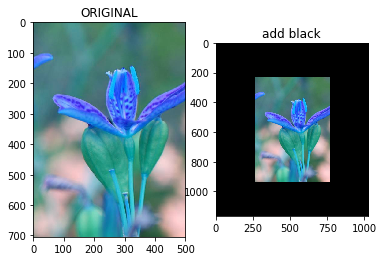

In [8]:
from matplotlib import pyplot as plt
plt.subplot(121),plt.imshow(img),plt.title('ORIGINAL')
plt.subplot(122),plt.imshow(image),plt.title('add black')

plt.show()